In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv("ECOAS_MachineLearning_202013_puntajes.csv", encoding="latin-1")

#Convert cauqlitative variables to quantitative 
data['Categoria'] = pd.factorize(data.Categoria)[0]
data['Subcategoria'] = pd.factorize(data.Subcategoria)[0]
data['TipoProfesor'] = pd.factorize(data.TipoProfesor)[0]
data['Departamento'] = pd.factorize(data.Departamento)[0]
data['Rectoría'] = pd.factorize(data.Rectoría)[0]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69983 entries, 0 to 69982
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 69983 non-null  int64  
 1   Rectoría           69983 non-null  int64  
 2   Campus             69983 non-null  object 
 3   Tamaño             67708 non-null  object 
 4   Latitud            67708 non-null  float64
 5   Longitud           67708 non-null  float64
 6   División           69983 non-null  object 
 7   Departamento       69983 non-null  int64  
 8   AnonMateria        69983 non-null  int64  
 9   crn                69983 non-null  int64  
 10  Pregunta           69983 non-null  object 
 11  NominaFict         69983 non-null  object 
 12  TipoProfesor       69983 non-null  int64  
 13  ProfesorTitular    69983 non-null  object 
 14  Comentarios        68318 non-null  object 
 15  DocumentSentiment  69983 non-null  float64
 16  sentimiento        687

In [2]:
# df = pd.DataFrame(data,columns=['DocumentSentiment','Categoria','Subcategoria', 'TipoProfesor', 'Departamento', 'Rectoría', 'APR', 'RET', 'REC'])
df = pd.DataFrame(data,columns=['DocumentSentiment', 'APR', 'RET', 'REC'])

target_names = df['DocumentSentiment'].unique().tolist()
feature_names = df.drop(['DocumentSentiment'], axis=1).columns.tolist()

n_targets = len(target_names)
n_features = len(feature_names)

X = df[feature_names]
y = df['DocumentSentiment']

In [3]:
df.head(10)

,DocumentSentiment,APR,RET,REC
0,0.10,9.59,9.67,9.41
1,0.30,9.59,9.67,9.41
2,0.00,9.59,9.67,9.41
3,0.48,9.59,9.67,9.41
4,0.09,9.59,9.67,9.41
5,0.46,9.59,9.67,9.41
6,0.27,9.59,9.67,9.41
7,0.13,9.59,9.67,9.41
8,-0.10,9.59,9.67,9.41
9,-0.15,9.59,9.67,9.41


In [4]:
df.describe()

,DocumentSentiment,APR,RET,REC
count,69983.000000,69983.000000,69983.000000,69983.000000
mean,0.194510,8.936814,9.074867,8.622936
std,0.293191,0.842533,0.682638,1.161023
min,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,8.600000,8.800000,8.095000
50%,0.240000,9.150000,9.230000,8.930000
75%,0.400000,9.500000,9.530000,9.450000
max,1.000000,10.000000,10.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69983 entries, 0 to 69982
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DocumentSentiment  69983 non-null  float64
 1   APR                69983 non-null  float64
 2   RET                69983 non-null  float64
 3   REC                69983 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


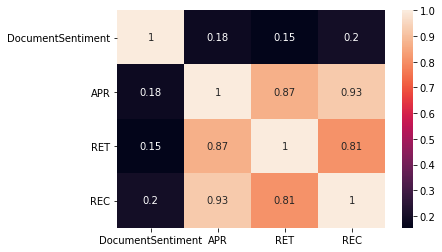

In [6]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

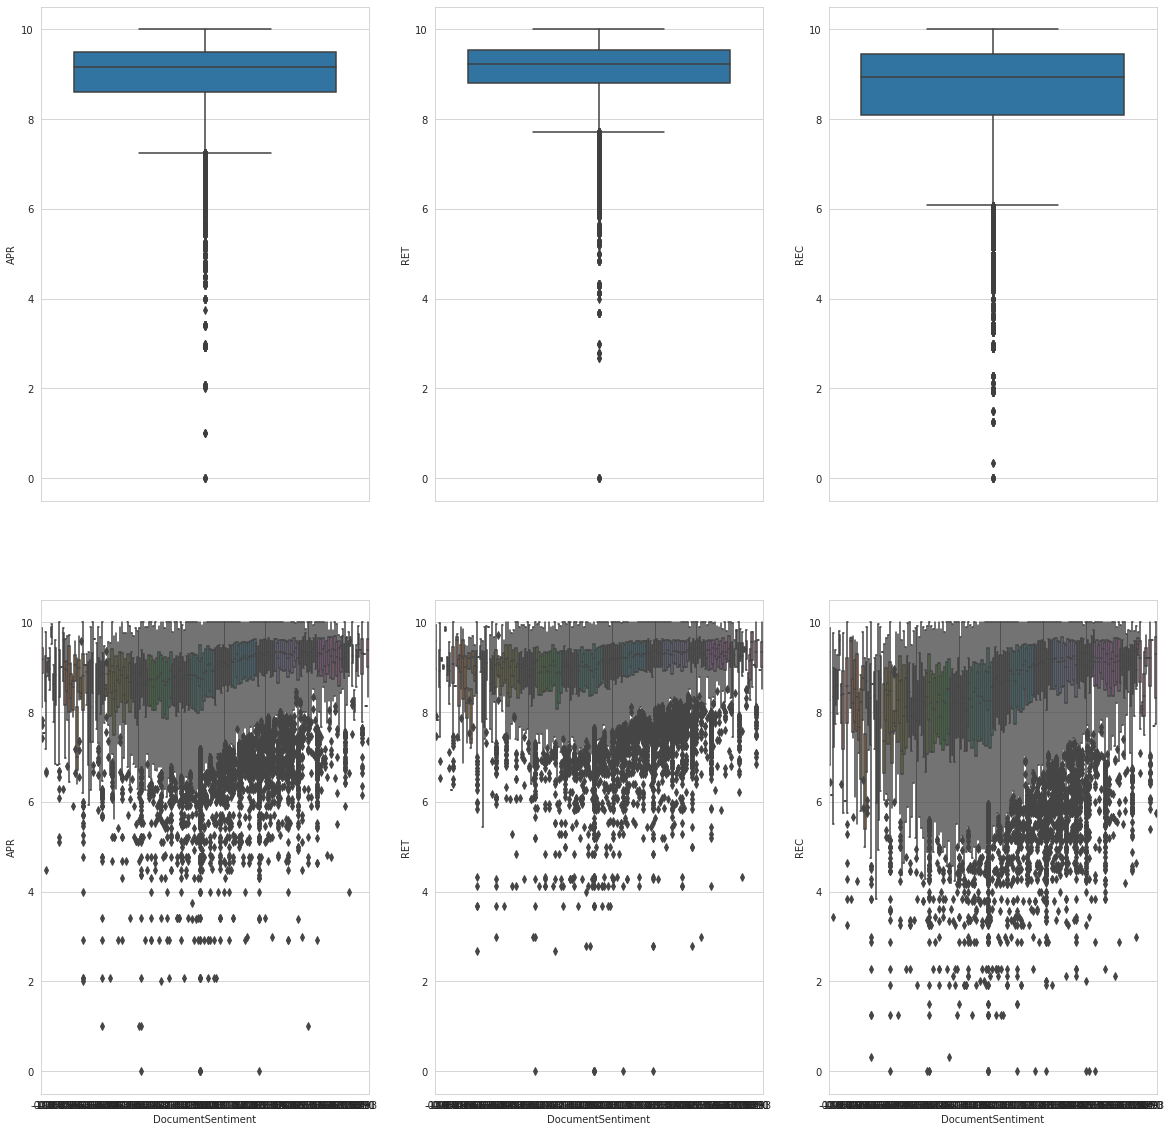

In [16]:
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(2, n_features, figsize=(20, 20))
    for num, name in enumerate(feature_names):
        sns.boxplot(y=name, data=df, ax=axes[0,num])
    for num, name in enumerate(feature_names):
        sns.boxplot(x='DocumentSentiment', y=name, data=df, ax=axes[1,num])

# Train models

## Split Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 
print('Shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Target values distribution:\nTrain:\n', y_train.value_counts(normalize=True), '\nTest:\n', y_test.value_counts(normalize=True))

Shapes: (52487, 3) (17496, 3) (52487,) (17496,)
Target values distribution:
Train:
  0.00    0.182769
 0.30    0.074933
 0.60    0.046450
 0.50    0.045611
 0.40    0.036981
           ...   
 0.93    0.000019
-0.77    0.000019
-0.54    0.000019
-0.88    0.000019
 0.84    0.000019
Name: DocumentSentiment, Length: 167, dtype: float64 
Test:
  0.00    0.177583
 0.30    0.078475
 0.60    0.049726
 0.50    0.045325
 0.40    0.035894
           ...   
-0.58    0.000057
-0.72    0.000057
-0.70    0.000057
-0.56    0.000057
-0.84    0.000057
Name: DocumentSentiment, Length: 154, dtype: float64


## Train a Decision Tree Classifier

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Hyperparameter Optimization (Grid Search with Cross Validation)

In [9]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':('giny', 'entropy'),
                'max_depth': [2,4,6,8,10,12,14,16,18]}

dt = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dt, param_grid=parameters, cv=5, scoring='f1_macro')
clf = clf.fit(X_train.astype('int'), y_train.astype('int'))
print('Best parameters:\n', clf.best_params_)
print('\nModel parameters:\n', clf.get_params())

C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

Best parameters:
 {'criterion': 'entropy', 'max_depth': 2}

Model parameters:
 {'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': 'deprecated', 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       ra

### Evaluate model

ValueError: Classification metrics can't handle a mix of continuous and binary targets

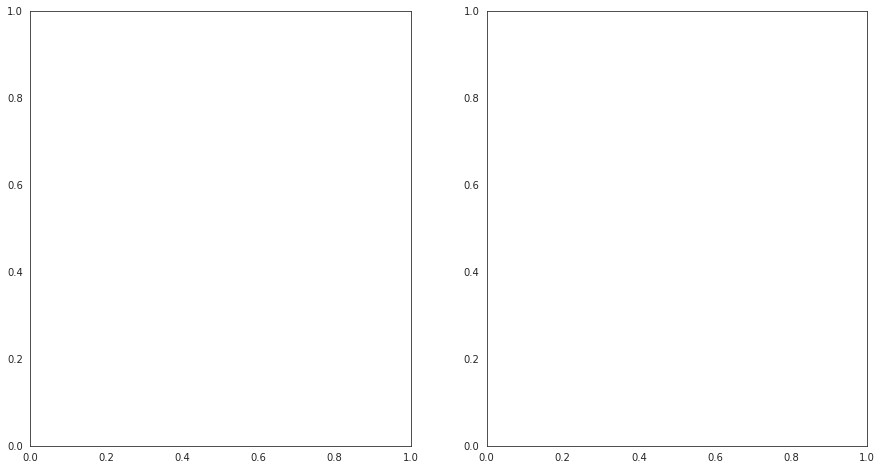

In [15]:
with sns.axes_style("white"):
    y_pred = clf.predict(X_test)
    print('Classification Report:\n',metrics.classification_report(y_test, y_pred))
    fig, axes = plt.subplots(1, 2, figsize=(15,8))
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=axes[0])
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=axes[1])
    axes[0].set_title('Confussion Matrix')
    axes[1].set_title('Confussion Matrix - Normalized')
    plt.show()

### Train Support Vector Machine

In [ ]:
from sklearn import svm

parameters = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.001,0.0001], 'C': [1, 10, 100, 1000]},
                {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, scoring='f1_macro')
clf = clf.fit(X_train.astype('int'), y_train.astype('int'))
print('Best parameters:\n', clf.best_params_)
print('\nModel parameters:\n', clf.get_params())